<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Checking-for-NA-values" data-toc-modified-id="Checking-for-NA-values-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Checking for NA values</a></span></li><li><span><a href="#Exploratory-Analysis" data-toc-modified-id="Exploratory-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Analysis</a></span></li><li><span><a href="#Checking-values-for-Varaibles" data-toc-modified-id="Checking-values-for-Varaibles-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Checking values for Varaibles</a></span></li><li><span><a href="#Identifying-a-linear-relationship" data-toc-modified-id="Identifying-a-linear-relationship-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Identifying a linear relationship</a></span></li><li><span><a href="#Highlighting-outliers" data-toc-modified-id="Highlighting-outliers-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Highlighting outliers</a></span></li><li><span><a href="#Encoding" data-toc-modified-id="Encoding-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Encoding</a></span></li><li><span><a href="#Random-Forest-Regressor" data-toc-modified-id="Random-Forest-Regressor-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Random Forest Regressor</a></span></li><li><span><a href="#Conclusion:" data-toc-modified-id="Conclusion:-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion:</a></span></li></ul></div>

Medical Cost Personal Datasets


Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [64]:
# Here we are importing packages that we will use for analysis
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# for the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

pd.pandas.set_option('display.max_columns', None)
%matplotlib inline

In [100]:

data =pd.read_csv("insurance.csv")


In [66]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [67]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.shape

(1338, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
cols= data.columns
cols

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [68]:
for i in cols:
    print(i, ':',data[i].nunique())

age : 47
sex : 2
bmi : 548
children : 6
smoker : 2
region : 4
charges : 1337


In [69]:
data['age']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [101]:
data['age_cat']=0
for i in range(len(data['age'])):
    if data['age'][i]<21:
        data['age_cat'][i]='young'
    if (data['age'][i]>20) and (data['age'][i]<61):
        data['age_cat'][i]='adult'
    if (data['age'][i]>60):
        data['age_cat'][i]='old'


C:\Users\Aman\Ana\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Aman\Ana\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Aman\Ana\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [71]:
data['age_cat'].value_counts()

adult    1081
young     166
old        91
Name: age_cat, dtype: int64

# Checking for NA values

In [12]:
data[data.isnull().any(axis=1)]

,age,sex,bmi,children,smoker,region,charges,age_cat


There is no null values in the dataset

# Exploratory Analysis

In [13]:
#Gender analysis
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

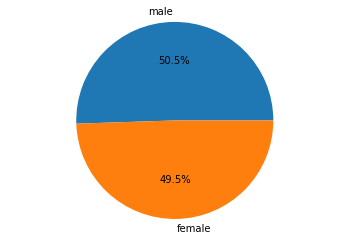

In [72]:

# Data to plot
dat=data['sex'].value_counts()
labels = dat.index
#sizes = dat
#colors = [ 'lightcoral', 'lightskyblue']
#explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(dat, labels=labels, autopct='%1.1f%%')

plt.axis('equal')
plt.show()


data= []

In [85]:
data.groupby(['region'])['charges'].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [86]:
data.groupby(['region'])['smoker'].count().nlargest()
#data.groupby(['listed_in(type)'])['rate'].mean().nlargest(10)

region
southeast    364
northwest    325
southwest    325
northeast    324
Name: smoker, dtype: int64

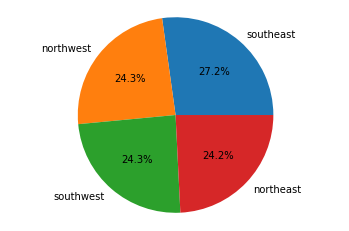

In [87]:

# Data to plot
dat=data.groupby(['region'])['smoker'].count().nlargest()
labels = dat.index
#sizes = dat
colors = [ 'lightcoral', 'lightskyblue']
#explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(dat, labels=labels, autopct='%1.1f%%' )

plt.axis('equal')
plt.show()


data= []

In [110]:
data.groupby(['age_cat'])['charges'].mean()
#data.groupby(['listed_in(type)'])['rate'].mean().nlargest(10)

age_cat
adult    13314.189677
old      21063.163398
young     8713.482413
Name: charges, dtype: float64

In [ ]:
# Pivot table 

In [106]:
impute_grps = data.pivot_table(values=["charges"], index=["sex","smoker","age_cat"], aggfunc=np.mean)
print (impute_grps)

                            charges
sex    smoker age_cat              
female no     adult     8950.205547
              old      15674.125987
              young     3583.173373
       yes    adult    31114.796995
              old      36883.434367
              young    24094.753987
male   no     adult     8261.481374
              old      15050.056492
              young     3247.222338
       yes    adult    33358.767819
              old      41385.032655
              young    27421.141389


In [ ]:
#People who are smoker have higher premium as compared to people who do not smoke

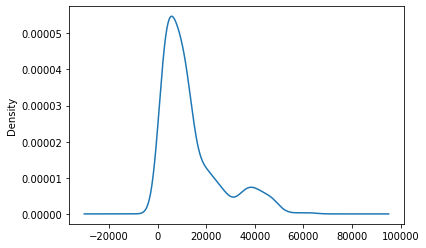

In [29]:
# Kernel Density Estimation plot (KDE)
data['charges'].plot(kind='kde')

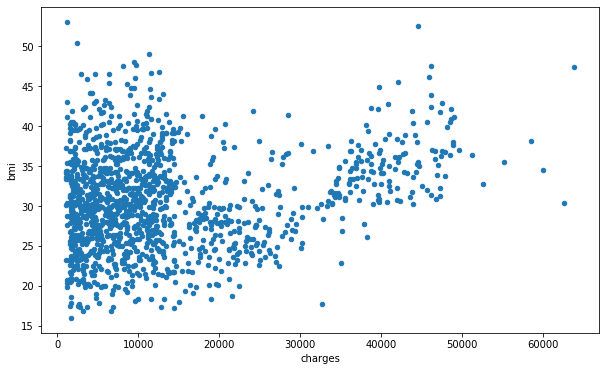

In [30]:
#Scatter 
data.plot.scatter(x='charges', y='bmi', figsize=(10, 6))

#Crosstab - Compute a simple cross tabulation of two (or more) factors.

In [32]:
pd.crosstab(data["sex"],data["region"],margins=True)

region,northeast,northwest,southeast,southwest,All
sex,,,,,
female,161,164,175,162,662
male,163,161,189,163,676
All,324,325,364,325,1338


In [33]:
#I have dropped the age_cat columns as it was negativily affecting the prediction accuracy of the model and 
#have used it only for exploratory analysis
data.drop('age_cat', axis=1, inplace=True)

#Heat Map


In [34]:
corr = data.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


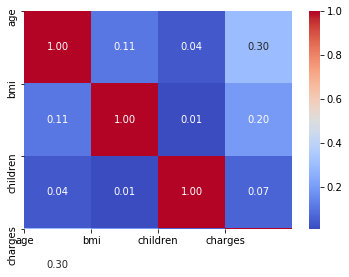

In [35]:
corr = data.corr()
#Plot figsize
#fig, ax = plt.subplots(figsize=(14, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [ ]:
#Checking different types of variables

In [36]:
categorical = [var for var in data.columns if data[var].dtype == 'O']


discrete = [ var for var in data.columns if var not in categorical
            and len(data[var].unique())<10 
           ]

continuous = [var for var in data.columns if var not in categorical and var not in discrete]
print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(categorical)} categorical variables')

There are 3 continuous variables
There are 1 discrete variables
There are 3 categorical variables


Categorical Variables

In [37]:
categorical

['sex', 'smoker', 'region']

Discrete Variables

In [38]:
discrete

['children']

Continuous Variables

In [39]:
continuous

['age', 'bmi', 'charges']

# Checking values for Varaibles


In [40]:
for var in categorical:
    if(var!='name' and var!='location' ):
        print(var, data[var].unique())

sex ['female' 'male']
smoker ['yes' 'no']
region ['southwest' 'southeast' 'northwest' 'northeast']


In [41]:
data[[var for var in data.columns if data[var].dtype == 'O']].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [42]:
data[[var for var in continuous]].describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [43]:
data[[var for var in discrete]].describe()

,children
count,1338.000000
mean,1.094918
std,1.205493
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,5.000000


# Identifying a linear relationship

#Scatter plots for continuous variables

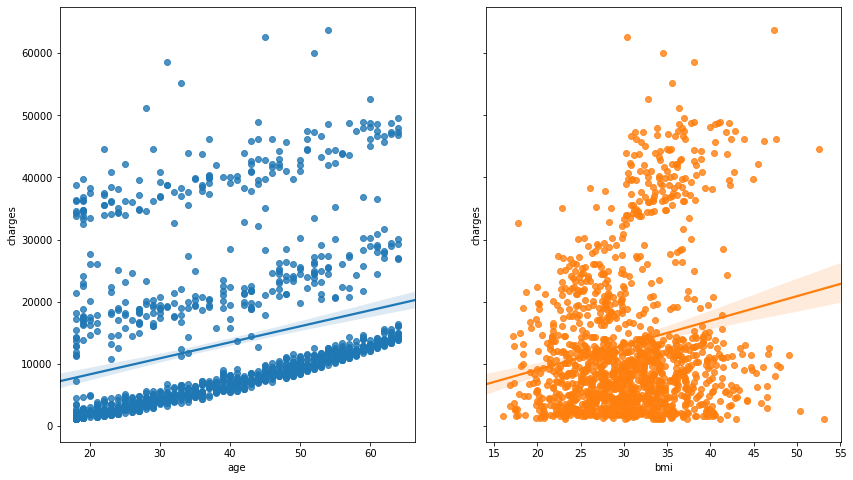

In [44]:
fig, axs = plt.subplots(ncols=2, nrows=1,sharey=True,figsize=(14,8))
axs = axs.flatten()

for i, var in enumerate(continuous):
    if var != "charges":
        sns.regplot(x=var, y="charges", data=data, ax=axs[i]);


#Scatter plot for discrete variables

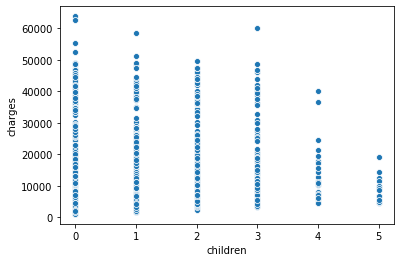

In [45]:
sns.scatterplot(x="children", y="charges", data=data );

# Highlighting outliers

An outlier is a data point which is significantly different from the remaining data. "An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism." [D. Hawkins. Identification of Outliers, Chapman and Hall , 1980.]

According to the inter-quantile range proximity rule, a value is an outlier if it falls outside the below boundaries:

Upper boundary = 75th quantile + (IQR * 1.5)

Lower boundary = 25th quantile - (IQR * 1.5)

where the inter-quantile range (IQR) is given by:

IQR = 75th quantile - 25th quantile

We can use boxplot to visualize outliers. In the boxplot , the IQR is indicated by the box, the median is indicated by the line within the box, the top and bottom edges of the box correspond to the 75th and 25th quantile, and the whiskers mark the proximity rule boundaries as described above. Values that fall outside the whiskers are considered outliers.


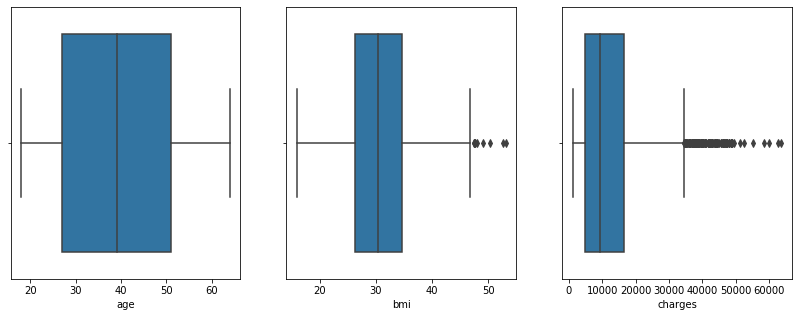

In [47]:
fig, axs = plt.subplots(ncols=3, nrows=1,figsize=(14,5))
axs = axs.flatten()

for i, var in enumerate(continuous ):
    sns.boxplot(data[data[var].notnull()][var], ax=axs[i], orient='h');

In [48]:
# not let's find in a dataframe those outliers:

# the function finds the upper and lower boundaries
# using the IQR proximity rule

# alternative, also presented in the book
# passing the distance as a function argument
# to allow for versatility

def find_boundaries(df, variable, distance):

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)


    return upper_boundary, lower_boundary

In [49]:
# let us find boundaries for LotFrontage
upper_boundary, lower_boundary = find_boundaries(data, 'bmi',1.5)
upper_boundary, lower_boundary


(47.290000000000006, 13.7)

In [50]:
# let's flag the outliers in the data set

outliers = np.where(data['bmi'] > upper_boundary, True,
                    np.where(data['bmi'] < lower_boundary, True, False))

In [51]:
# how many outliers did we find?
outliers.sum()

9

In [52]:
# let's print a few of them

outliers_df = data.loc[outliers, 'bmi']
outliers_df.head()

116    49.06
286    48.07
401    47.52
543    47.41
847    50.38
Name: bmi, dtype: float64

In [53]:
outliers_dict={}
for var in continuous:
    upper_boundary, lower_boundary = find_boundaries(data, var,1.5)
    outliers = np.where(data[var] > upper_boundary, True,
                    np.where(data[var] < lower_boundary, True, False))
    outliers_dict[var]=data.loc[outliers, var]  
    

In [54]:
print(outliers_dict['bmi'].count())

9


In [55]:
for key, value in outliers_dict.items():
    print(key, outliers_dict[key].count(),outliers_dict[key].min(),outliers_dict[key].max())

age 0 nan nan
bmi 9 47.41 53.13
charges 139 34617.84065 63770.42801


# Encoding

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(
  data.drop('charges', axis=1), data['charges'], test_size=0.3, random_state=0)


In [57]:
# let's create the encoder
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
ohe_enc = OneHotCategoricalEncoder(variables=categorical,
    top_categories=None,
    drop_last=True)  # to return k-1, false to return k

In [58]:
# fit the encoder to the train set: it will learn the variables and 
# categories to encode
ohe_enc.fit(X_train)

OneHotCategoricalEncoder(drop_last=True, top_categories=None,
                         variables=['sex', 'smoker', 'region'])

In [59]:
# let's transform train and test set

X_train_enc = ohe_enc.transform(X_train)
X_test_enc = ohe_enc.transform(X_test)

In [60]:
X_train_enc.shape

(936, 8)

In [61]:
X_test_enc.columns

Index(['age', 'bmi', 'children', 'sex_female', 'smoker_no', 'region_northeast',
       'region_southwest', 'region_southeast'],
      dtype='object')

# Random Forest Regressor

In [63]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(X_train_enc,y_train)
forest_train_pred = forest.predict(X_train_enc)
forest_test_pred = forest.predict(X_test_enc)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 3478259.913, MSE test data: 22980280.091
R2 train data: 0.975, R2 test data: 0.856


The analysis using random forest algorithm gives accuracy of 97.5% on the training data and 85.6% on the testing dataset

# Conclusion:

I tried many machine learning algorithms(linear regression, ridge, random forest)to build a model for predicting premium charges for the insurance data. Random forest gives the best model with an accuracy of 97.5% on the training data and 85.6% on the testing dataset.

The dataset contains some outliers. I tried to remove these outliers, which affected the accuracy of the model. Finally, I did not remove the outliers.